<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Импортируем необходимые библиотеки.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from joblib import dump
from sklearn import tree
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, f1_score, precision_score,
                             recall_score, roc_auc_score, roc_curve)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle

In [2]:
df = pd.read_csv('/datasets/Churn.csv') # прочитаем csv-файл

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Отлично. Импортировали требуемые для анализа библиотеки и загрузили данные. Сейчас посмотрим на их состояние и если всё ОК, сможем приступать к построению моделей....
</div>

In [3]:
df.head() # Выведем первые 5 строчек датафрейма df на экран.

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
df.info() # Выведем основную информацию о датафрейме с помощью метода info().

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Итак, в таблице 14 столбцов и 10000 строк. Типы данных в столбцах — float64(3), int64(8), object(3). В столбце Tenure (сколько лет человек является клиентом банка) - есть пропущенные значения.

Согласно документации к данным:


**Признаки**
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

**Целевой признак**

- Exited — факт ухода клиента

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.007322,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.021418,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,-0.000062,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.013134,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.007322,-0.021418,-0.000062,-0.013134,1.000000,-0.007911,0.011979,0.027232,-0.032178,0.010520,-0.016761
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.007911,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.011979,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.027232,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.032178,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.010520,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


Корреляции между столбцами не обнаружено.

In [7]:
df.columns = df.columns.str.lower() # приведем все столбцы к нижнему регистру 

Названия столбцов не записаны в «змеином регистре», переименуем колонки.

In [8]:
df = df.rename(columns={'rownumber': 'row_number', 'customerid': 'customer_id', 
                        'creditscore': 'credit_score', 'numofproducts': 'num_of_products',
                        'hascrcard': 'has_cr_card', 'isactivemember': 'is_active_member', 
                        'estimatedsalary': 'estimated_salary'}) # переименование столбцов

In [9]:
df.columns # проверяем результат

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

In [10]:
df['tenure'].isna().sum() # посмотрим на количество пропусков в столбце tenure.

909

In [11]:
df = df.dropna(subset=['tenure']) # удалим пропущенные значения в столбце tenure, так как их небольшое количество (около 10%)

In [12]:
df['tenure'].isna().sum() # проверим, что строки удалились. 

0

Удалим столбцы row_number (индекс строки в данных), customer_id (уникальный идентификатор клиента), surname (фамилия), которые  не влияют на факт ухода клиента и на обучение модели.

In [13]:
df = df.drop(['row_number', 'customer_id', 'surname'], axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      9091 non-null   int64  
 1   geography         9091 non-null   object 
 2   gender            9091 non-null   object 
 3   age               9091 non-null   int64  
 4   tenure            9091 non-null   float64
 5   balance           9091 non-null   float64
 6   num_of_products   9091 non-null   int64  
 7   has_cr_card       9091 non-null   int64  
 8   is_active_member  9091 non-null   int64  
 9   estimated_salary  9091 non-null   float64
 10  exited            9091 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 852.3+ KB


Итак, после предобработки данных в таблице осталось 11 столбцов и 9091 строк. Типы данных в столбцах — float64(3), int64(6), object(2). В столбце tenure (сколько лет человек является клиентом банка) были пропущенные значения, мы удалили их. Так же в названиях колонок были нарушения стиля, но мы это уже исправили. 

## Исследование задачи

Наши данные содержат категориальные признаки. Преобразовать категориальные признаки в численные поможет техника прямого кодирования, или отображения (англ. One-Hot Encoding, OHE). Техникой OHE категориальные признаки переводятся в численные в два этапа:
- Для каждого значения признака создаётся новый столбец;
- Если объекту категория подходит, присваивается 1, если нет — 0.

Новые признаки называются дамми-переменными.

In [15]:
print(df.dtypes)

credit_score          int64
geography            object
gender               object
age                   int64
tenure              float64
balance             float64
num_of_products       int64
has_cr_card           int64
is_active_member      int64
estimated_salary    float64
exited                int64
dtype: object


Применим прямое кодирование ко всему датафрейму. Вызовем функцию pd.get_dummies() c аргументом drop_first, чтобы не попасть в дамми-ловушку. Сохраним таблицу в переменной df_ohe.

In [16]:
df_ohe = pd.get_dummies(df, drop_first=True)
df_ohe.head(20)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
5,645,44,8.0,113755.78,2,1,0,149756.71,1,0,1,1
6,822,50,7.0,0.00,2,1,1,10062.80,0,0,0,1
7,376,29,4.0,115046.74,4,1,0,119346.88,1,1,0,0
8,501,44,4.0,142051.07,2,0,1,74940.50,0,0,0,1
9,684,27,2.0,134603.88,1,1,1,71725.73,0,0,0,1


In [17]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_score       9091 non-null   int64  
 1   age                9091 non-null   int64  
 2   tenure             9091 non-null   float64
 3   balance            9091 non-null   float64
 4   num_of_products    9091 non-null   int64  
 5   has_cr_card        9091 non-null   int64  
 6   is_active_member   9091 non-null   int64  
 7   estimated_salary   9091 non-null   float64
 8   exited             9091 non-null   int64  
 9   geography_Germany  9091 non-null   uint8  
 10  geography_Spain    9091 non-null   uint8  
 11  gender_Male        9091 non-null   uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 736.9 KB


Теперь в таблице 12 столбцов. В столбце geography было 3 признака (страны) - Spain, Germany, France. Для каждого значения признака создаётся столбец. Аргумент drop_first удаляет первую колонку, теперь получаем 2 столбца -  geography_Germany и geography_Spain, а в колонке gender было  2 признака - Female и Male. В результате мы получили только 1 столбец. Это позволяет избежать дамми-ловушки.

Разобъем данные на 3 выборки: обучающую (train), валидационную (valid) и тестовую (test) в соотношении 3:1:1. 
Установим параметр (random_state) равным 12345.
Объявимте четыре переменные и запишем в них:
- признаки: features_train, features_valid;
- целевой признак: target_train, target_valid.

In [18]:
features = df_ohe.drop(['exited'], axis=1)
target = df_ohe['exited'] 

features_train, features_valid, target_train, target_valid = train_test_split(features, target, 
test_size=0.4, random_state=12345, stratify = target) # отделим 60% данных для обучающей выборки
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid,
test_size=0.5, random_state=12345, stratify = target_valid) # разобъем по 20% данных для тестовой и валидационной выборок

**Масштабирование признаков**

Стандартизируем численные признаки. Импортируем StandardScaler из модуля sklearn.preprocessing.
Создадим объект структуры StandardScaler() и настроим его на обучающих данных. 
Сохраним преобразованные обучающую, валидационную и тестовые выборки в переменных: features_train, features_valid и features_test. 

In [19]:
pd.options.mode.chained_assignment = None
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric]) # Масштабируем численные признаки обучающей выборки
features_valid[numeric] = scaler.transform(features_valid[numeric]) # Масштабируем численные признаки валидационной выборки 
features_test[numeric] = scaler.transform(features_test[numeric]) # Масштабируем численные признаки тестовой выборки 
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(5454, 11)
(1818, 11)
(1819, 11)


**Проверка адекватности модели**

Чтобы оценить адекватность модели, проверим, как часто в целевом признаке встречается класс «1» или «0». Количество уникальных значений подсчитывается методом value_counts().

In [20]:
class_frequency = df_ohe['exited'].value_counts(normalize=True)
print(class_frequency)

0    0.796062
1    0.203938
Name: exited, dtype: float64


Видно, что классы в целевом признаке несбалансированны - наблюдается сильный дисбаланс классов, что плохо сказывается на обучении модели. 

Посмотрим как ведут себя модели без учёта дисбаланса.

**Исследуем модели**

**Модель DecisionTreeClassifier - классификатор дерева решений**

In [21]:
def classification_metrics(target_valid, predictions_valid, probabilities_one_valid):
    print('Полнота', recall_score(target_valid, predictions_valid))
    print('Точность', precision_score(target_valid, predictions_valid))
    print('F1-мера', f1_score(target_valid, predictions_valid))
    print('AUC-ROC', roc_auc_score(target_valid, probabilities_one_valid))

In [22]:
%%time
best_depth = 0
best_samples_split = 0
best_samples_leaf = 0
best_result = 0
for depth in range(1,21):
    for samples_split in range (2,10):
        for samples_leaf in range (1,10):
            model_dtc = DecisionTreeClassifier(random_state=12345, max_depth=depth, min_samples_split = samples_split,
            min_samples_leaf = samples_leaf) # обучим модель с заданными параметрами
            model_dtc.fit(features_train, target_train) # обучим модель на тренировочной выборке
            predictions_dtc = model_dtc.predict(features_valid) # получим предсказания модели
            probabilities_valid = model_dtc.predict_proba(features_valid)
            probabilities_one_valid = probabilities_valid[:, 1]
            result = accuracy_score(target_valid, predictions_dtc) # посчитаем качество модели на валидационной выборке
            if result > best_result:
                best_depth = depth
                best_samples_split = samples_split
                best_samples_leaf = samples_leaf
                best_result = result 
print('Accuracy модели:', best_result)
print('Глубина дерева =', best_depth, 'min_samples_split =', best_samples_split, 'min_samples_leaf =', best_samples_leaf)
classification_metrics(target_valid, predictions_dtc, probabilities_one_valid)

Accuracy модели: 0.8668866886688669
Глубина дерева = 6 min_samples_split = 2 min_samples_leaf = 3
Полнота 0.522911051212938
Точность 0.671280276816609
F1-мера 0.5878787878787878
AUC-ROC 0.8150667707330157
CPU times: user 32.7 s, sys: 100 ms, total: 32.8 s
Wall time: 32.8 s


F1-мера является мерой точности и полноты модели, и ее низкое значение означает, что модель делает много ошибок как в предсказании положительных, так и отрицательных классов. Это может быть вызвано недостаточным количеством данных для обучения.

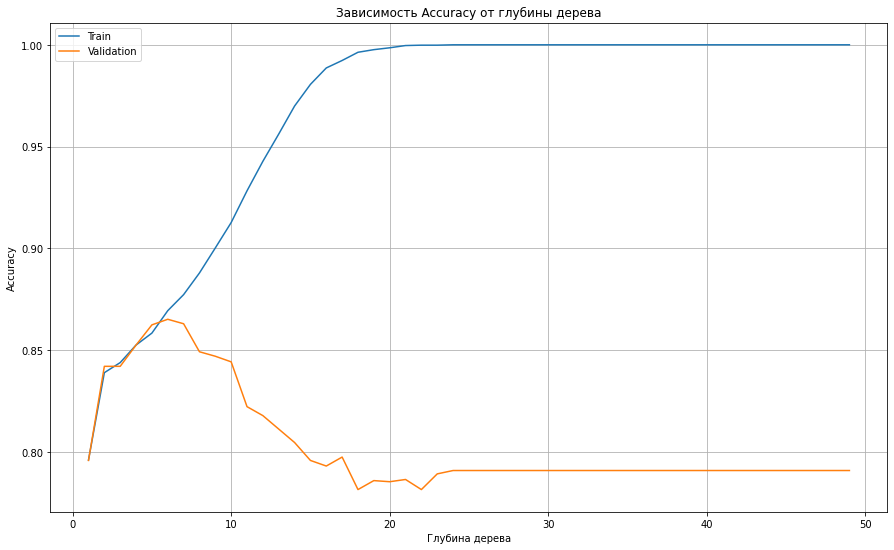

In [23]:
train_scores = []
valid_scores = []
max_depth = range(1,50)
for depth in max_depth:
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    model.fit(features_train, target_train) 
    train_scores.append(model.score(features_train, target_train))
    valid_scores.append(model.score(features_valid, target_valid))
plt.figure(figsize=(15, 9))
plt.plot(max_depth, train_scores, label='Train')
plt.plot(max_depth, valid_scores, label='Validation')
plt.title('Зависимость Accuracy от глубины дерева')
plt.xlabel('Глубина дерева')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

При достижении определенной глубины деревьев наша доля верных ответов выходит на асимптоту. Увеличение глубины дерева приводит к переобучению модели. Точность на валидационной выборке растет до глубины 6, а потом снижается в связи с переобучением, поэтому оптимальная глубина дерева равна 6.  На обучающей выборке точность достигает 1 и модель перестает изменяться. 

**Алгоритм классификации RandomForestClassifier - классификатор случайного леса**

In [24]:
%%time
best_est = 0
best_depth = 0
best_result = 0
for depth in range(1, 21):
    for est in range(1, 150, 10):
        model_rfc = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model_rfc.fit(features_train, target_train)
        predictions_rfc = model_rfc.predict(features_valid)
        probabilities_valid = model_rfc.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        result = model_rfc.score(features_valid, target_valid) 
        if result > best_result:
            best_est = est
            best_depth = depth
            best_result = result 
print('Accuracy модели:', best_result)
print('Глубина дерева =', best_depth, 'количество деревьев =', best_est)
classification_metrics(target_valid, predictions_rfc, probabilities_one_valid)

Accuracy модели: 0.8729372937293729
Глубина дерева = 19 количество деревьев = 131
Полнота 0.49595687331536387
Точность 0.7634854771784232
F1-мера 0.6013071895424836
AUC-ROC 0.8720654500341818
CPU times: user 2min 15s, sys: 807 ms, total: 2min 16s
Wall time: 2min 16s


**Модель LogisticRegression - логистическая регрессия**

In [25]:
model_lr = LogisticRegression(random_state=12345, solver='liblinear') 
model_lr.fit(features_train, target_train) 
predictions_lr = model_lr.predict(features_valid)
probabilities_valid = model_lr.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
result = model_lr.score(features_valid, target_valid)
print("Accuracy модели:", result)
classification_metrics(target_valid, predictions_lr, probabilities_one_valid)

Accuracy модели: 0.8151815181518152
Полнота 0.22371967654986524
Точность 0.6335877862595419
F1-мера 0.3306772908366534
AUC-ROC 0.7893010355098474


**Вывод:** 
- Accuracy модели DecisionTreeClassifier: 0.86 при глубине дерева = 6 min_samples_split = 2 и min_samples_leaf = 3
- Accuracy модели RandomForestClassifier: 0.87 при глубине дерева = 19 и количестве деревьев = 131
- Accuracy  модели LogisticRegression: 0.815. 

Без устранения дисбаланса лучше всего себя показала модель случайного леса, достигшая F1-мера = 0.6013071895424836, AUC-ROC = 0.8720654500341818 при глубине дерева = 19 и количестве деревьев = 131.

Если не учитывать дисбаланс в модели, то она может быть склонна предсказывать чаще те классы, которые встречаются чаще в обучающей выборке.

## Борьба с дисбалансом

**Взвешивание классов**

Применим параметр class_weight для борьбы с дисбалансом.

In [26]:
%%time
best_depth = 0
best_samples_split = 0
best_samples_leaf = 0
best_result = 0
for depth in range(1,21):
    for samples_split in range (2,10):
        for samples_leaf in range (1,10):
            model_dtc = DecisionTreeClassifier(random_state=12345, max_depth=depth, min_samples_split = samples_split,
            min_samples_leaf = samples_leaf, class_weight='balanced') 
            model_dtc.fit(features_train, target_train) 
            predictions_dtc = model_dtc.predict(features_valid) 
            probabilities_valid = model_dtc.predict_proba(features_valid)
            probabilities_one_valid = probabilities_valid[:, 1]
            result = accuracy_score(target_valid, predictions_dtc) 
            if result > best_result:
                best_depth = depth
                best_samples_split = samples_split
                best_samples_leaf = samples_leaf
                best_result = result             
classification_metrics(target_valid, predictions_dtc, probabilities_one_valid)

Полнота 0.7250673854447439
Точность 0.44098360655737706
F1-мера 0.5484199796126402
AUC-ROC 0.799206276765573
CPU times: user 33 s, sys: 92 ms, total: 33.1 s
Wall time: 33.1 s


In [27]:
%%time
best_est = 0
best_depth = 0
best_result = 0
for depth in range(1, 21):
    for est in range(1, 150, 10):
        model_rfc = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced') 
        model_rfc.fit(features_train, target_train)
        predictions_rfc = model_rfc.predict(features_valid)
        probabilities_valid = model_rfc.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        result = model_rfc.score(features_valid, target_valid) 
        if result > best_result:
            best_est = est
            best_depth = depth
            best_result = result 
print('Глубина дерева =', best_depth, 'количество деревьев =', best_est)
classification_metrics(target_valid, predictions_rfc, probabilities_one_valid)

Глубина дерева = 20 количество деревьев = 31
Полнота 0.4528301886792453
Точность 0.8
F1-мера 0.5783132530120482
AUC-ROC 0.8700564603408484
CPU times: user 2min 16s, sys: 684 ms, total: 2min 17s
Wall time: 2min 17s


In [28]:
model_lr = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced') 
model_lr.fit(features_train, target_train) 
predictions_lr = model_lr.predict(features_valid)
probabilities_valid = model_lr.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
result = model_lr.score(features_valid, target_valid)
classification_metrics(target_valid, predictions_lr, probabilities_one_valid)

Полнота 0.7304582210242587
Точность 0.3876967095851216
F1-мера 0.5065420560747663
AUC-ROC 0.790763304317698


**Увеличение выборки - техника upsampling**

Преобразование проходит в несколько этапов:
- Разделим обучающую выборку на отрицательные и положительные объекты;
- Скопируем несколько раз положительные объекты;
- с учётом полученных данных создать новую обучающую выборку;
- перемешать данные: идущие друг за другом одинаковые вопросы не помогут обучению.

In [29]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(features_upsampled.shape)
print(target_upsampled.shape)
print(target_upsampled.value_counts(normalize = True))

(8790, 11)
(8790,)
1    0.50603
0    0.49397
Name: exited, dtype: float64


In [30]:
%%time
best_depth = 0
best_result = 0
for depth in range(1,21):
    for samples_split in range (2, 10):
        for samples_leaf in range (1,10):
            model_dtc_upsampled = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
            model_dtc_upsampled.fit(features_upsampled, target_upsampled) 
            predictions_dtc_upsampled = model_dtc_upsampled.predict(features_valid) 
            probabilities_valid = model_dtc_upsampled.predict_proba(features_valid)
            probabilities_one_valid = probabilities_valid[:, 1]
            result = accuracy_score(target_valid, predictions_dtc_upsampled)
            if result > best_result:
                best_depth = depth
                best_samples_split = samples_split
                best_samples_leaf = samples_leaf
                best_result = result             
classification_metrics(target_valid, predictions_dtc_upsampled, probabilities_one_valid)

Полнота 0.5336927223719676
Точность 0.515625
F1-мера 0.5245033112582781
AUC-ROC 0.7025754558646293
CPU times: user 41.6 s, sys: 128 ms, total: 41.7 s
Wall time: 41.7 s


In [31]:
%%time
best_est = 0
best_depth = 0
best_result = 0
for depth in range(1,21):
    for est in range(1, 150, 10):
        model_rfc_upsampled = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model_rfc_upsampled.fit(features_upsampled, target_upsampled)
        predictions_rfc_upsampled = model_rfc_upsampled.predict(features_valid)
        probabilities_valid = model_rfc_upsampled.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        result = model_rfc_upsampled.score(features_valid, target_valid) 
        if result > best_result:
            best_est = est
            best_depth = depth
            best_result = result 
print('Глубина дерева =', best_depth, 'количество деревьев =', best_est)            
classification_metrics(target_valid, predictions_rfc_upsampled, probabilities_one_valid)

Глубина дерева = 20 количество деревьев = 91
Полнота 0.5822102425876011
Точность 0.6923076923076923
F1-мера 0.6325036603221084
AUC-ROC 0.8670611377382708
CPU times: user 2min 44s, sys: 808 ms, total: 2min 45s
Wall time: 2min 45s


In [32]:
model_lr_upsampled = LogisticRegression(random_state=12345, solver='liblinear') 
model_lr_upsampled.fit(features_upsampled, target_upsampled) 
predictions_lr_upsampled = model_lr_upsampled.predict(features_valid)
probabilities_valid = model_lr_upsampled.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
result = model_lr_upsampled.score(features_valid, target_valid)
classification_metrics(target_valid, predictions_lr_upsampled, probabilities_one_valid)

Полнота 0.7358490566037735
Точность 0.3845070422535211
F1-мера 0.5050878815911193
AUC-ROC 0.790767029843323


**Уменьшение выборки - техника downsampling**

In [33]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)
print(features_downsampled.shape)
print(target_downsampled.shape)

(2198, 11)
(2198,)


In [34]:
%%time
best_depth = 0
best_samples_split = 0
best_samples_leaf = 0
best_result = 0
for depth in range(1,21):
    for samples_split in range (2, 10):
        for samples_leaf in range (1,10):
            model_dtc_downsampled = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
            model_dtc_downsampled.fit(features_downsampled, target_downsampled) 
            predictions_dtc_downsampled = model_dtc_downsampled.predict(features_valid) 
            probabilities_valid = model_dtc_downsampled.predict_proba(features_valid)
            probabilities_one_valid = probabilities_valid[:, 1]
            result = accuracy_score(target_valid, predictions_dtc_downsampled) 
            if result > best_result:
                best_depth = depth
                best_samples_split = samples_split
                best_samples_leaf = samples_leaf
                best_result = result 
classification_metrics(target_valid, predictions_dtc_downsampled, probabilities_one_valid)

Полнота 0.7358490566037735
Точность 0.37916666666666665
F1-мера 0.5004582951420715
AUC-ROC 0.7134670300295993
CPU times: user 15.9 s, sys: 44 ms, total: 16 s
Wall time: 16 s


In [35]:
%%time
best_est = 0
best_depth = 0
best_result = 0
for depth in range(1,21):
    for est in range(1, 150, 10):
        model_rfc_downsampled = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model_rfc_downsampled.fit(features_downsampled, target_downsampled)
        predictions_rfc_downsampled = model_rfc_downsampled.predict(features_valid)
        probabilities_valid = model_rfc_downsampled.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        result = model_rfc_downsampled.score(features_valid, target_valid) 
        if result > best_result:
            best_est = est
            best_depth = depth
            best_result = result 
classification_metrics(target_valid, predictions_rfc_downsampled, probabilities_one_valid)

Полнота 0.7978436657681941
Точность 0.4925124792013311
F1-мера 0.6090534979423868
AUC-ROC 0.8792193906157735
CPU times: user 1min 18s, sys: 376 ms, total: 1min 18s
Wall time: 1min 18s


In [36]:
model_lr_downsampled = LogisticRegression(random_state=12345, solver='liblinear') 
model_lr_downsampled.fit(features_downsampled, target_downsampled) 
predictions_lr_downsampled = model_lr_downsampled.predict(features_valid)
probabilities_valid = model_lr_downsampled.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
result = model_lr_downsampled.score(features_valid, target_valid)
classification_metrics(target_valid, predictions_lr_downsampled, probabilities_one_valid)

Полнота 0.7466307277628033
Точность 0.38687150837988826
F1-мера 0.5096596136154553
AUC-ROC 0.7911153664892695


Мы рассмотрели несколько методов борьбы с дисбалансом классов. Лучше всего показал себя upsampling при устранении дисбаланса.

Лучшая модель - RandomForestClassifier.

- Глубина дерева = 20 количество деревьев = 91
- Полнота 0.5822102425876011
- Точность 0.6923076923076923
- F1-мера 0.6325036603221084
- AUC-ROC 0.8670611377382708

## Тестирование модели

Посмотрим как ведет себя лучшая модель на тестовых данных.

In [46]:
model_rfc_best = RandomForestClassifier(max_depth = 21,  n_estimators = 91, random_state = 12345)
model_rfc_best.fit(features_upsampled, target_upsampled)
model_rfc_best_prediction = model_rfc_best.predict(features_test)
probabilities_test = model_rfc_best.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

print('Полнота', recall_score(target_test, model_rfc_best_prediction))
print('Точность', precision_score(target_test, model_rfc_best_prediction))
print('F1-мера', f1_score(target_test, model_rfc_best_prediction))
print('AUC-ROC', roc_auc_score(target_test, probabilities_one_test))

Полнота 0.5471698113207547
Точность 0.6766666666666666
F1-мера 0.6050670640834575
AUC-ROC 0.8417447245759557


Построим ROC-кривую (кривая ошибок), чтобы посмотреть как визуально выглядят результаты

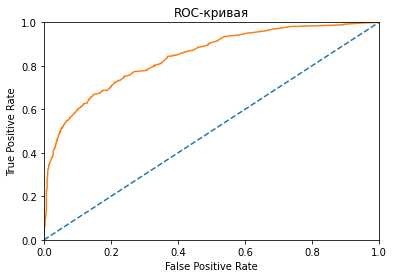

In [47]:
probabilities_test = model_rfc_best.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Нам удалось достичь F1-меры выше 0.59  
Показатель точности равен 0.676  — модель с высокой вероятностью предскажет уход клиентов.
- F1-мера 0.6050670640834575
- AUC-ROC 0.8417447245759557

Данная модель поможет банковским маркетологам лучше определять уйдёт ли клиент из банка в ближайшее время или нет.

**Вывод**

Таким образом, мы рассмотрели исторические данные о поведении клиентов и расторжении договоров с банком. 

Провели предобработку данных. В столбце tenure (сколько лет человек является клиентом банка) были пропущенные значения, мы удалили их, т.к. не было никакой с другими признаками.  

Разбили данные на на три части: обучающую, валидационную и тестовую в соотношении 3:1:1. Провели стандартизацию численных признаков.

Построили следующие модели для задачи классификации: DecisionTreeClassifier - классификатор дерева решений, RandomForestClassifier - классификатор случайного леса, LogisticRegression - логистическая регрессия. 

Без устранения дисбаланса лучше всего себя показала модель случайного леса, достигшая F1-мера = 0.6013071895424836, AUC-ROC = 0.8720654500341818 при глубине дерева = 19 и количестве деревьев = 131.

Скоректировали балланс класса. Использовали техники взвешивания классов, увеличение (upsampling) и уменьшение (downsampling) выборки. 

Наилучший результат показала модель - RandomForestClassifier.

- Глубина дерева = 20 количество деревьев = 91
- Полнота 0.5822102425876011
- Точность 0.6923076923076923
- F1-мера 0.6325036603221084
- AUC-ROC 0.8670611377382708

Посмотрели как ведет себя лучшая модель на тестовых данных и получили следующие результаты: 

- Полнота 0.5471698113207547
- Точность 0.6766666666666666
- F1-мера 0.6050670640834575
- AUC-ROC 0.8417447245759557

Нам удалось достичь F1-меры выше 0.59. Значение F1-меры нашей модели равно 0.605 на тестовой выборке, а AUC-ROC равно 0.8417447245759557. Значения метрик достаточно хорошие. Полученая модель поможет банковским маркетологам лучше определять уйдёт ли клиент из банка в ближайшее время или нет.